In [1115]:
from minisom import MiniSom
import pandas as pd 
import numpy as np 
from minisom import MiniSom 
data = pd.read_csv("./hcvdat0.csv")

In [1116]:
data.dtypes

Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

In [1117]:
data = data.drop(["Unnamed: 0"],axis=1)

In [1118]:
# filling missing value
from sklearn import preprocessing
for i in data.columns:
    data[i].fillna(method = "ffill",inplace = True)


In [1119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
data["Sex"] = data["Sex"].astype('float64')


In [1120]:
Class =  data['Category']
Attributes = data.drop(['Category'],axis = 1)


In [1121]:
Attributes.dtypes

Age       int64
Sex     float64
ALB     float64
ALP     float64
ALT     float64
AST     float64
BIL     float64
CHE     float64
CHOL    float64
CREA    float64
GGT     float64
PROT    float64
dtype: object

In [1122]:
Attributes["Age"] = Attributes["Age"].astype('float64')


In [1123]:
Attributes = preprocessing.scale(Attributes)
for i in range(615):
    length = sum(map(lambda x: float(x**2), Attributes[i]))**0.5
    for j in range(len(Attributes[i])):
        Attributes[i][j] = Attributes[i][j]/length
print(Attributes)

[[-0.5086075   0.26350198 -0.17902513 ...  0.16484807 -0.16657788
  -0.18694197]
 [-0.595132    0.30832904 -0.20948096 ... -0.05688527 -0.17004822
   0.32077707]
 [-0.61287436  0.31752109  0.36583266 ...  0.03787778 -0.04633948
   0.53776653]
 ...
 [ 0.28940616 -0.22056058 -0.38302284 ... -0.05142119  0.07914696
   0.32353449]
 [-0.0417013  -0.37447456 -0.44412179 ... -0.17528042  0.05702043
  -0.05740687]
 [ 0.31403917 -0.3425672  -0.2648166  ... -0.0782232  -0.02757483
  -0.2038841 ]]


In [1124]:
print(Attributes[0])

[-0.5086075   0.26350198 -0.17902513 -0.19062668 -0.25059439 -0.12724772
 -0.06574275 -0.19060426 -0.62768192  0.16484807 -0.16657788 -0.18694197]


In [1125]:
som = MiniSom(16,16,12,sigma=1.5,learning_rate=0.5)
som.pca_weights_init(Attributes)
som.train(Attributes,1000,verbose=True)


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.5809180148521413


In [1126]:
for i in range(len(Class)):
    if(Class[i] == "0=Blood Donor"):
        Class[i] = 0
    elif Class[i] == "0s=suspect Blood Donor":
        Class[i] = 1
    elif Class[i] == "1=Hepatitis":
        Class[i] = 2
    elif Class[i] == "2=Fibrosis":
        Class[i] = 3
    elif Class[i] == "3=Cirrhosis":
        Class[i] = 4

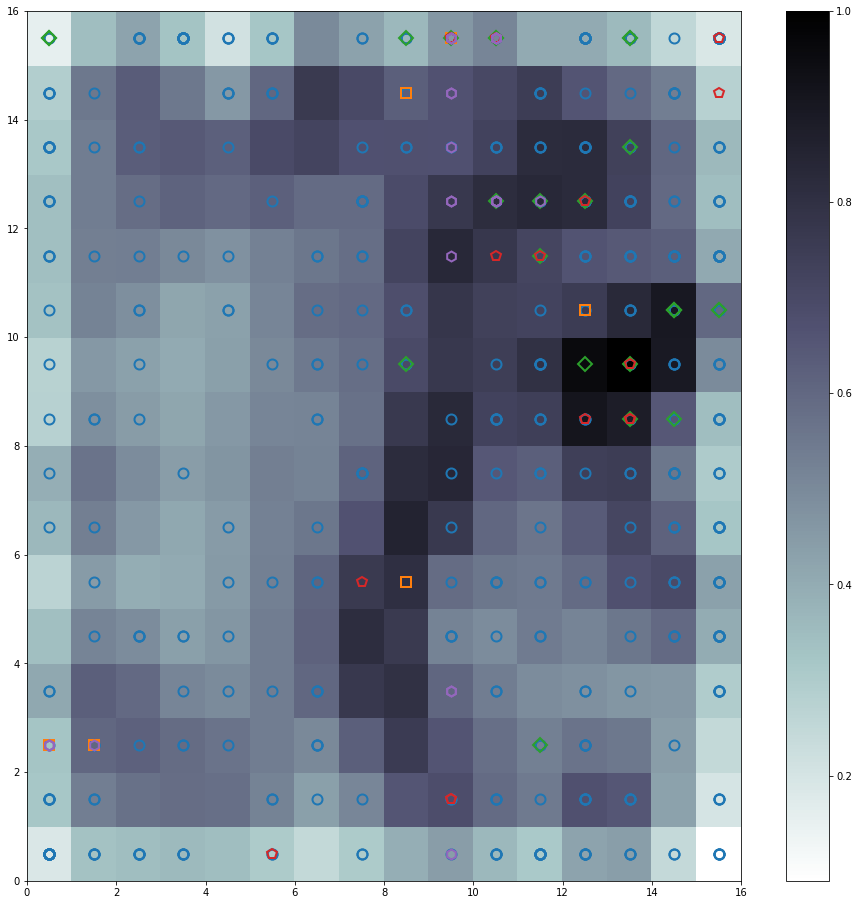

In [1127]:

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

markers = ['o', 's', 'D','p','h']  # circle, square, Diamond, pentagon, hexigon
colors = ['C0', 'C1', 'C2','C3','C4']
for cnt, xx in enumerate(Attributes):
    w = som.winner(xx)  # getting the winner
    # print(f"cnt {cnt}\n w: {w}")
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[Class[cnt]], markerfacecolor='None',
             markeredgecolor=colors[Class[cnt]], markersize=10, markeredgewidth=2)

plt.show()

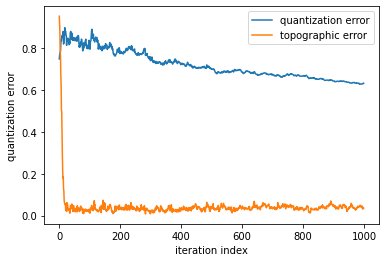

In [1128]:
som = MiniSom(10, 20, 12, sigma=3., learning_rate=.7,
              neighborhood_function='gaussian', random_seed=10)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(Attributes))
    som.update(Attributes[rand_i], som.winner(Attributes[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(Attributes))
    t_error.append(som.topographic_error(Attributes))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('quantization error')
plt.xlabel('iteration index')
plt.legend()
plt.show()

Classification

In [1129]:
Attributes = np.apply_along_axis(lambda x: x/np.linalg.norm(x),1,Attributes)

In [1130]:

def classify(som, data):

    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [1131]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(Attributes, Class, stratify=Class)

som = MiniSom(7, 7, 12, sigma=1.5, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)
som.pca_weights_init(X_train)
som.train_random(X_train, 100, verbose=False)

print(classification_report(y_test, classify(som, X_test)))

LinAlgError: Eigenvalues did not converge